В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [7]:
raw_df = pd.read_csv("drive/MyDrive/Machine Learning для людей/data/bank/train.csv")

In [13]:
print("Розмір тренувального набору:", raw_df.shape)
raw_df.head()


Розмір тренувального набору: (15000, 14)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [10]:
train_df, val_df = train_test_split(raw_df,
                                    test_size=0.2,
                                    random_state=42,
                                    stratify=raw_df['Exited'])

In [11]:
print("Розмір train_df:", train_df.shape)
print("Розмір val_df:", val_df.shape)

print("\nЧастка Exited у train:", train_df['Exited'].mean())
print("Частка Exited у val:", val_df['Exited'].mean())

Розмір train_df: (12000, 14)
Розмір val_df: (3000, 14)

Частка Exited у train: 0.2035
Частка Exited у val: 0.20333333333333334


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [15]:
target_col = 'Exited'

input_cols = list(train_df.columns.drop([target_col, 'id', 'CustomerId', 'Surname']))

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

print("Вхідні колонки (input_cols):", input_cols)
print("Цільова колонка (target_col):", target_col)
print(f"Розмір train_inputs: {train_inputs.shape}")
print(f"Розмір val_inputs: {val_inputs.shape}")

train_inputs.head()

Вхідні колонки (input_cols): ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Цільова колонка (target_col): Exited
Розмір train_inputs: (12000, 10)
Розмір val_inputs: (3000, 10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7180,682.0,France,Male,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24
10393,684.0,France,Female,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31
80,705.0,Germany,Male,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01
3365,669.0,Spain,Male,58.0,0.0,0.00,2.0,0.0,1.0,51565.98
12236,707.0,France,Male,21.0,3.0,0.00,2.0,1.0,1.0,148564.76


3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [16]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

print("Числові колонки:", numeric_cols)
print("Категоріальні колонки:", categorical_cols)

Числові колонки: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Категоріальні колонки: ['Geography', 'Gender']


4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [17]:
scaler = MinMaxScaler()

scaler.fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoder.fit(train_inputs[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_encoded = encoder.transform(train_inputs[categorical_cols])
val_encoded = encoder.transform(val_inputs[categorical_cols])

train_inputs[encoded_cols] = train_encoded
val_inputs[encoded_cols] = val_encoded

print("\nПерші 5 рядків оброблених train_inputs:")
display(train_inputs.head())

print("\nПерші 5 рядків оброблених val_inputs:")
display(val_inputs.head())


Перші 5 рядків оброблених train_inputs:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.599045,France,Male,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,France,Female,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,Germany,Male,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0



Перші 5 рядків оброблених val_inputs:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.675418,Germany,Male,0.500000,0.1,0.551870,1.000000,1.0,1.0,0.364704,0.0,1.0,0.0,0.0,1.0
3646,0.386635,France,Male,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,1.0,0.0,0.0,0.0,1.0
5306,0.715990,France,Female,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,1.0,0.0,0.0,1.0,0.0
652,0.577566,France,Female,0.446429,0.4,0.742441,0.000000,0.0,1.0,0.558109,1.0,0.0,0.0,1.0,0.0
2627,0.589499,Spain,Female,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,0.0,1.0,1.0,0.0


Після визначення числових і категоріальних колонок визначаємо окремо, що з ними робити.
Для категорій - текстові дані перетворюємо в бінарні (1-є ознака, 0 - нема).Наприклад, Geography стає трьома колонками: Geography_France, Geography_Germany, Geography_Spain.
Для числових колонок - використовуємо масштабування. Використовуємо MinMaxScaler, щоб привести всі числові значення до діапазону $[0, 1]$.
Масштабування вирівнює "права" всіх ознак, дозволяючи моделі адекватно оцінювати вагу кожного фактора.

---



5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [24]:
os.makedirs('data', exist_ok=True)

train_inputs.to_parquet('data/train_inputs.parquet')
val_inputs.to_parquet('data/val_inputs.parquet')

pd.DataFrame(train_targets).to_parquet('data/train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('data/val_targets.parquet')

print("Список файлів у папці 'data':")
files = os.listdir('data')
print(files)

Список файлів у папці 'data':
['val_targets.parquet', 'train_targets.parquet', 'train_inputs.parquet', 'val_inputs.parquet']


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [26]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

print("Розмір X_train:", X_train.shape)
print("Розмір X_val:", X_val.shape)

model = LogisticRegression(solver='liblinear', random_state=42)

print("\nПочинаємо навчання...")
model.fit(X_train, train_targets)
print("Модель успішно навчена!")

weights = pd.DataFrame({
    'feature': X_train.columns,
    'weight': model.coef_[0]
}).sort_values('weight', ascending=False)

print("\nТоп-5 факторів, що підвищують ризик відтоку (позитивна вага):")
display(weights.head(5))

print("\nТоп-5 факторів, що утримують клієнта (негативна вага):")
display(weights.tail(5))

Розмір X_train: (12000, 13)
Розмір X_val: (3000, 13)

Починаємо навчання...
Модель успішно навчена!

Топ-5 факторів, що підвищують ризик відтоку (позитивна вага):


,feature,weight
1,Age,8.451461
9,Geography_Germany,0.607940
7,EstimatedSalary,0.189330
2,Tenure,-0.075076
5,HasCrCard,-0.187527



Топ-5 факторів, що утримують клієнта (негативна вага):


,feature,weight
10,Geography_Spain,-1.053322
3,Balance,-1.095227
12,Gender_Male,-1.133419
6,IsActiveMember,-1.253461
4,NumOfProducts,-3.934637


7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?


=== Train Metrics ===
F1 Score: 0.6352 (Баланс точності і повноти)
AUROC:    0.8824 (Якість ранжування)
------------------------------


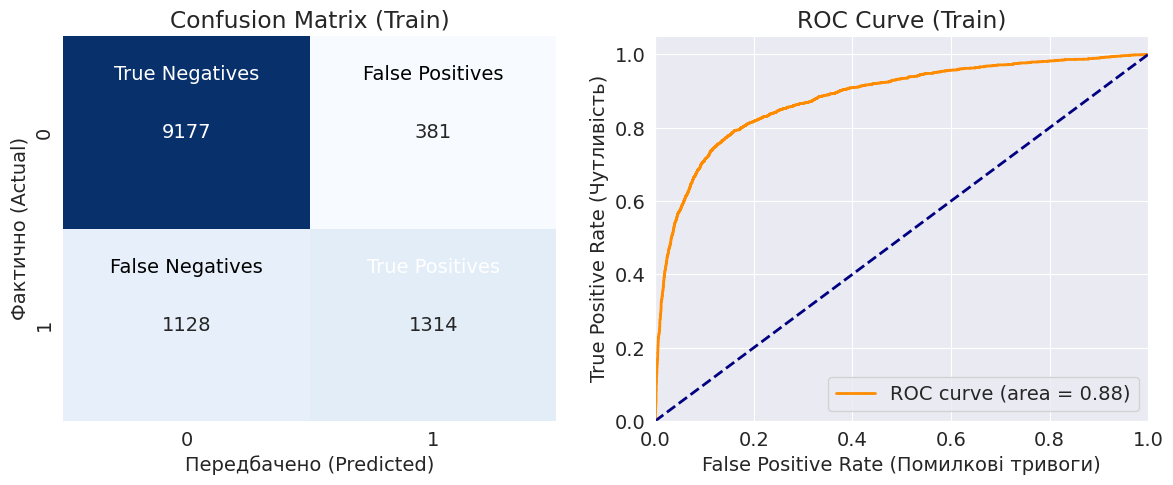


=== Validation Metrics ===
F1 Score: 0.6412 (Баланс точності і повноти)
AUROC:    0.8797 (Якість ранжування)
------------------------------


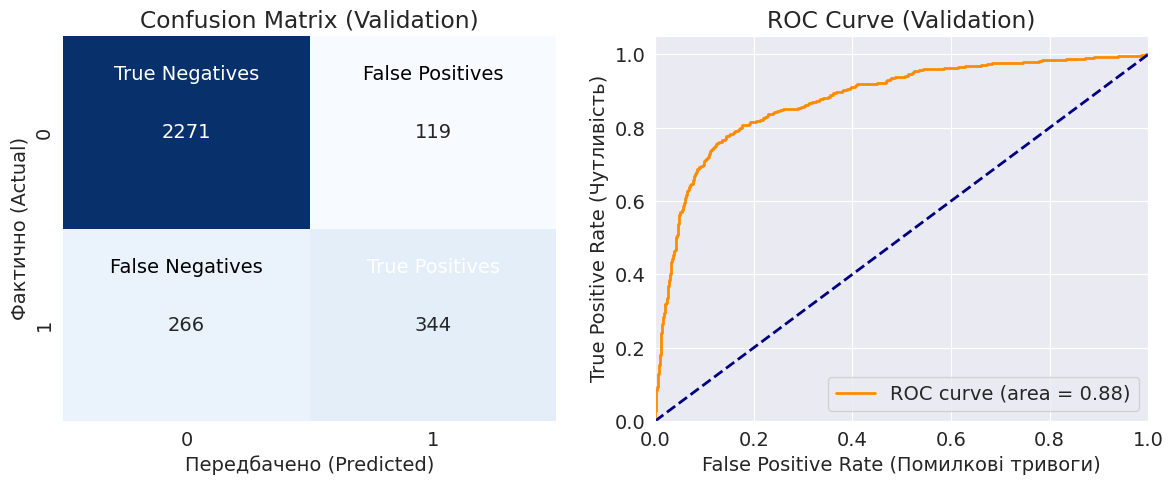

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, roc_auc_score

y_train = train_targets
y_val = val_targets

def evaluate_model(model, X, y, dataset_name="Data"):
    preds = model.predict(X)
    probs = model.predict_proba(X)[:, 1]

    conf_mat = confusion_matrix(y, preds)
    f1 = f1_score(y, preds)
    roc_auc = roc_auc_score(y, probs)

    print(f"\n=== {dataset_name} Metrics ===")
    print(f"F1 Score: {f1:.4f} (Баланс точності і повноти)")
    print(f"AUROC:    {roc_auc:.4f} (Якість ранжування)")
    print("-" * 30)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
    axes[0].set_title(f'Confusion Matrix ({dataset_name})')
    axes[0].set_xlabel('Передбачено (Predicted)')
    axes[0].set_ylabel('Фактично (Actual)')
    axes[0].text(0.5, 0.2, 'True Negatives', ha='center', va='center', color='white')
    axes[0].text(1.5, 0.2, 'False Positives', ha='center', va='center', color='black')
    axes[0].text(0.5, 1.2, 'False Negatives', ha='center', va='center', color='black')
    axes[0].text(1.5, 1.2, 'True Positives', ha='center', va='center', color='white')


    fpr, tpr, thresholds = roc_curve(y, probs)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate (Помилкові тривоги)')
    axes[1].set_ylabel('True Positive Rate (Чутливість)')
    axes[1].set_title(f'ROC Curve ({dataset_name})')
    axes[1].legend(loc="lower right")

    plt.show()

evaluate_model(model, X_train, y_train, "Train")
evaluate_model(model, X_val, y_val, "Validation")

AUROC (~0.88): Модель хороша. Показник 0.88 свідчить про те, що модель відмінно розрізняє класи. Вона майже завжди ставить вищу ймовірність відтоку реальному "втікачу", ніж лояльному клієнту.

F1 Score (~0.64): Результат задовільний. Це типова ситуація для незбалансованих даних (клієнтів, що йдуть, менше). Модель обережна і пропускає частину тих, хто йде (False Negatives), але загалом працює коректно.

Перенавчання: Його немає. Метрики на Train і Validation майже однакові, що є дуже добрим знаком. Модель надійна.

---



8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [31]:
from sklearn.metrics import accuracy_score

majority_class = train_targets.mode()[0]
print(f"Мажоритарний клас: {majority_class} (0 - залишився, 1 - пішов)")

dummy_train_preds = [majority_class] * len(train_targets)
dummy_val_preds = [majority_class] * len(val_targets)

dummy_train_acc = accuracy_score(train_targets, dummy_train_preds)
dummy_val_acc = accuracy_score(val_targets, dummy_val_preds)

logreg_train_acc = accuracy_score(train_targets, model.predict(X_train))
logreg_val_acc = accuracy_score(val_targets, model.predict(X_val))

print("\n--- ПОРІВНЯННЯ ТОЧНОСТІ (ACCURACY) ---")
print(f"Dummy Model (Train):   {dummy_train_acc:.2%} (просто вгадуємо більшість)")
print(f"Dummy Model (Val):     {dummy_val_acc:.2%}")
print("-" * 40)
print(f"LogReg Model (Train):  {logreg_train_acc:.2%} (наша модель)")
print(f"LogReg Model (Val):    {logreg_val_acc:.2%}")

Мажоритарний клас: 0.0 (0 - залишився, 1 - пішов)

--- ПОРІВНЯННЯ ТОЧНОСТІ (ACCURACY) ---
Dummy Model (Train):   79.65% (просто вгадуємо більшість)
Dummy Model (Val):     79.67%
----------------------------------------
LogReg Model (Train):  87.42% (наша модель)
LogReg Model (Val):    87.17%


Dummy Model (Базова лінія): Точність близько 79-80%. Це означає, що якби ми просто всім казали "ти не підеш з банку", ми б вже були праві у 80% випадків (бо більшість людей не йде).

Наша модель: Точність близько 87-88%.

Різниця: Ми покращили результат на ~8% порівняно з примітивним вгадуванням.

---



9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [32]:
import joblib

bundle = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

joblib.dump(bundle, 'log_reg.joblib')
print("✅ Модель та об'єкти успішно збережено в 'log_reg.joblib'")


loaded_bundle = joblib.load('log_reg.joblib')

model_2 = loaded_bundle['model']

print("\nПеревірка model_2:")
print(f"Тип об'єкта: {type(model_2)}")
print(f"Коефіцієнти моделі (перші 3): {model_2.coef_[0][:3]}")

test_pred = model_2.predict(X_val[:5])
print(f"Прогноз на перших 5 прикладах: {test_pred}")

✅ Модель та об'єкти успішно збережено в 'log_reg.joblib'

Перевірка model_2:
Тип об'єкта: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Коефіцієнти моделі (перші 3): [-0.87270577  8.4514612  -0.07507594]
Прогноз на перших 5 прикладах: [0. 0. 0. 0. 0.]


10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [ ]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])

In [33]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    df = input_df.copy()
    df[numeric_cols] = scaler.transform(df[numeric_cols])
    encoded_feature_names = list(encoder.get_feature_names_out(categorical_cols))
    df[encoded_feature_names] = encoder.transform(df[categorical_cols])

    X_input = df[numeric_cols + encoded_feature_names]
    prob = model.predict_proba(X_input)[:, 1]

    return prob

probs = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])

print("Передбачені ймовірності для перших 5 клієнтів:")
print(probs)

Передбачені ймовірності для перших 5 клієнтів:
[0.00654092 0.0366679  0.37111937 0.37653484 0.97577854]


11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [34]:
test_raw_df = pd.read_csv("drive/MyDrive/Machine Learning для людей/data/bank/test.csv")

test_preds = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)

test_raw_df['Exited'] = test_preds

print("Розмір тестового набору:", test_raw_df.shape)
print("\nПерші 5 рядків з передбаченнями:")
display(test_raw_df[['id', 'Surname', 'Exited']].head())

Розмір тестового набору: (10000, 14)

Перші 5 рядків з передбаченнями:


,id,Surname,Exited
0,15000,Chu,0.075316
1,15001,Mazzi,0.035366
2,15002,Onyekachi,0.153210
3,15003,Martin,0.194872
4,15004,Kenechukwu,0.055660


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [36]:
submission = pd.read_csv("drive/MyDrive/Machine Learning для людей/data/bank/sample_submission.csv")

submission['Exited'] = test_raw_df['Exited']

print("Перші 5 рядків вашого сабмішну:")
display(submission.head())

submission.to_csv('submission_log_reg.csv', index=False)

print("\n✅ Файл 'submission_log_reg.csv' успішно збережено!")

Перші 5 рядків вашого сабмішну:


,id,Exited
0,15000,0.075316
1,15001,0.035366
2,15002,0.153210
3,15003,0.194872
4,15004,0.055660



✅ Файл 'submission_log_reg.csv' успішно збережено!
